# Graph Centrality Homework

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
M=nx.read_gml("C:\Users\User\Documents\IPython Notebooks\\polblogs.gml", relabel=True)

In [4]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)



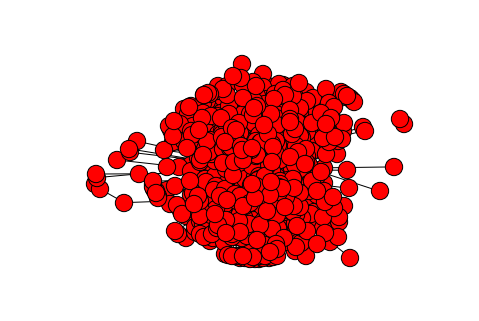

In [5]:
nx.draw(G)

1. Create a nice looking graph of the political blog network

C:\Users\User\Anaconda\lib\site-packages\matplotlib\font_manager.py:1282: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


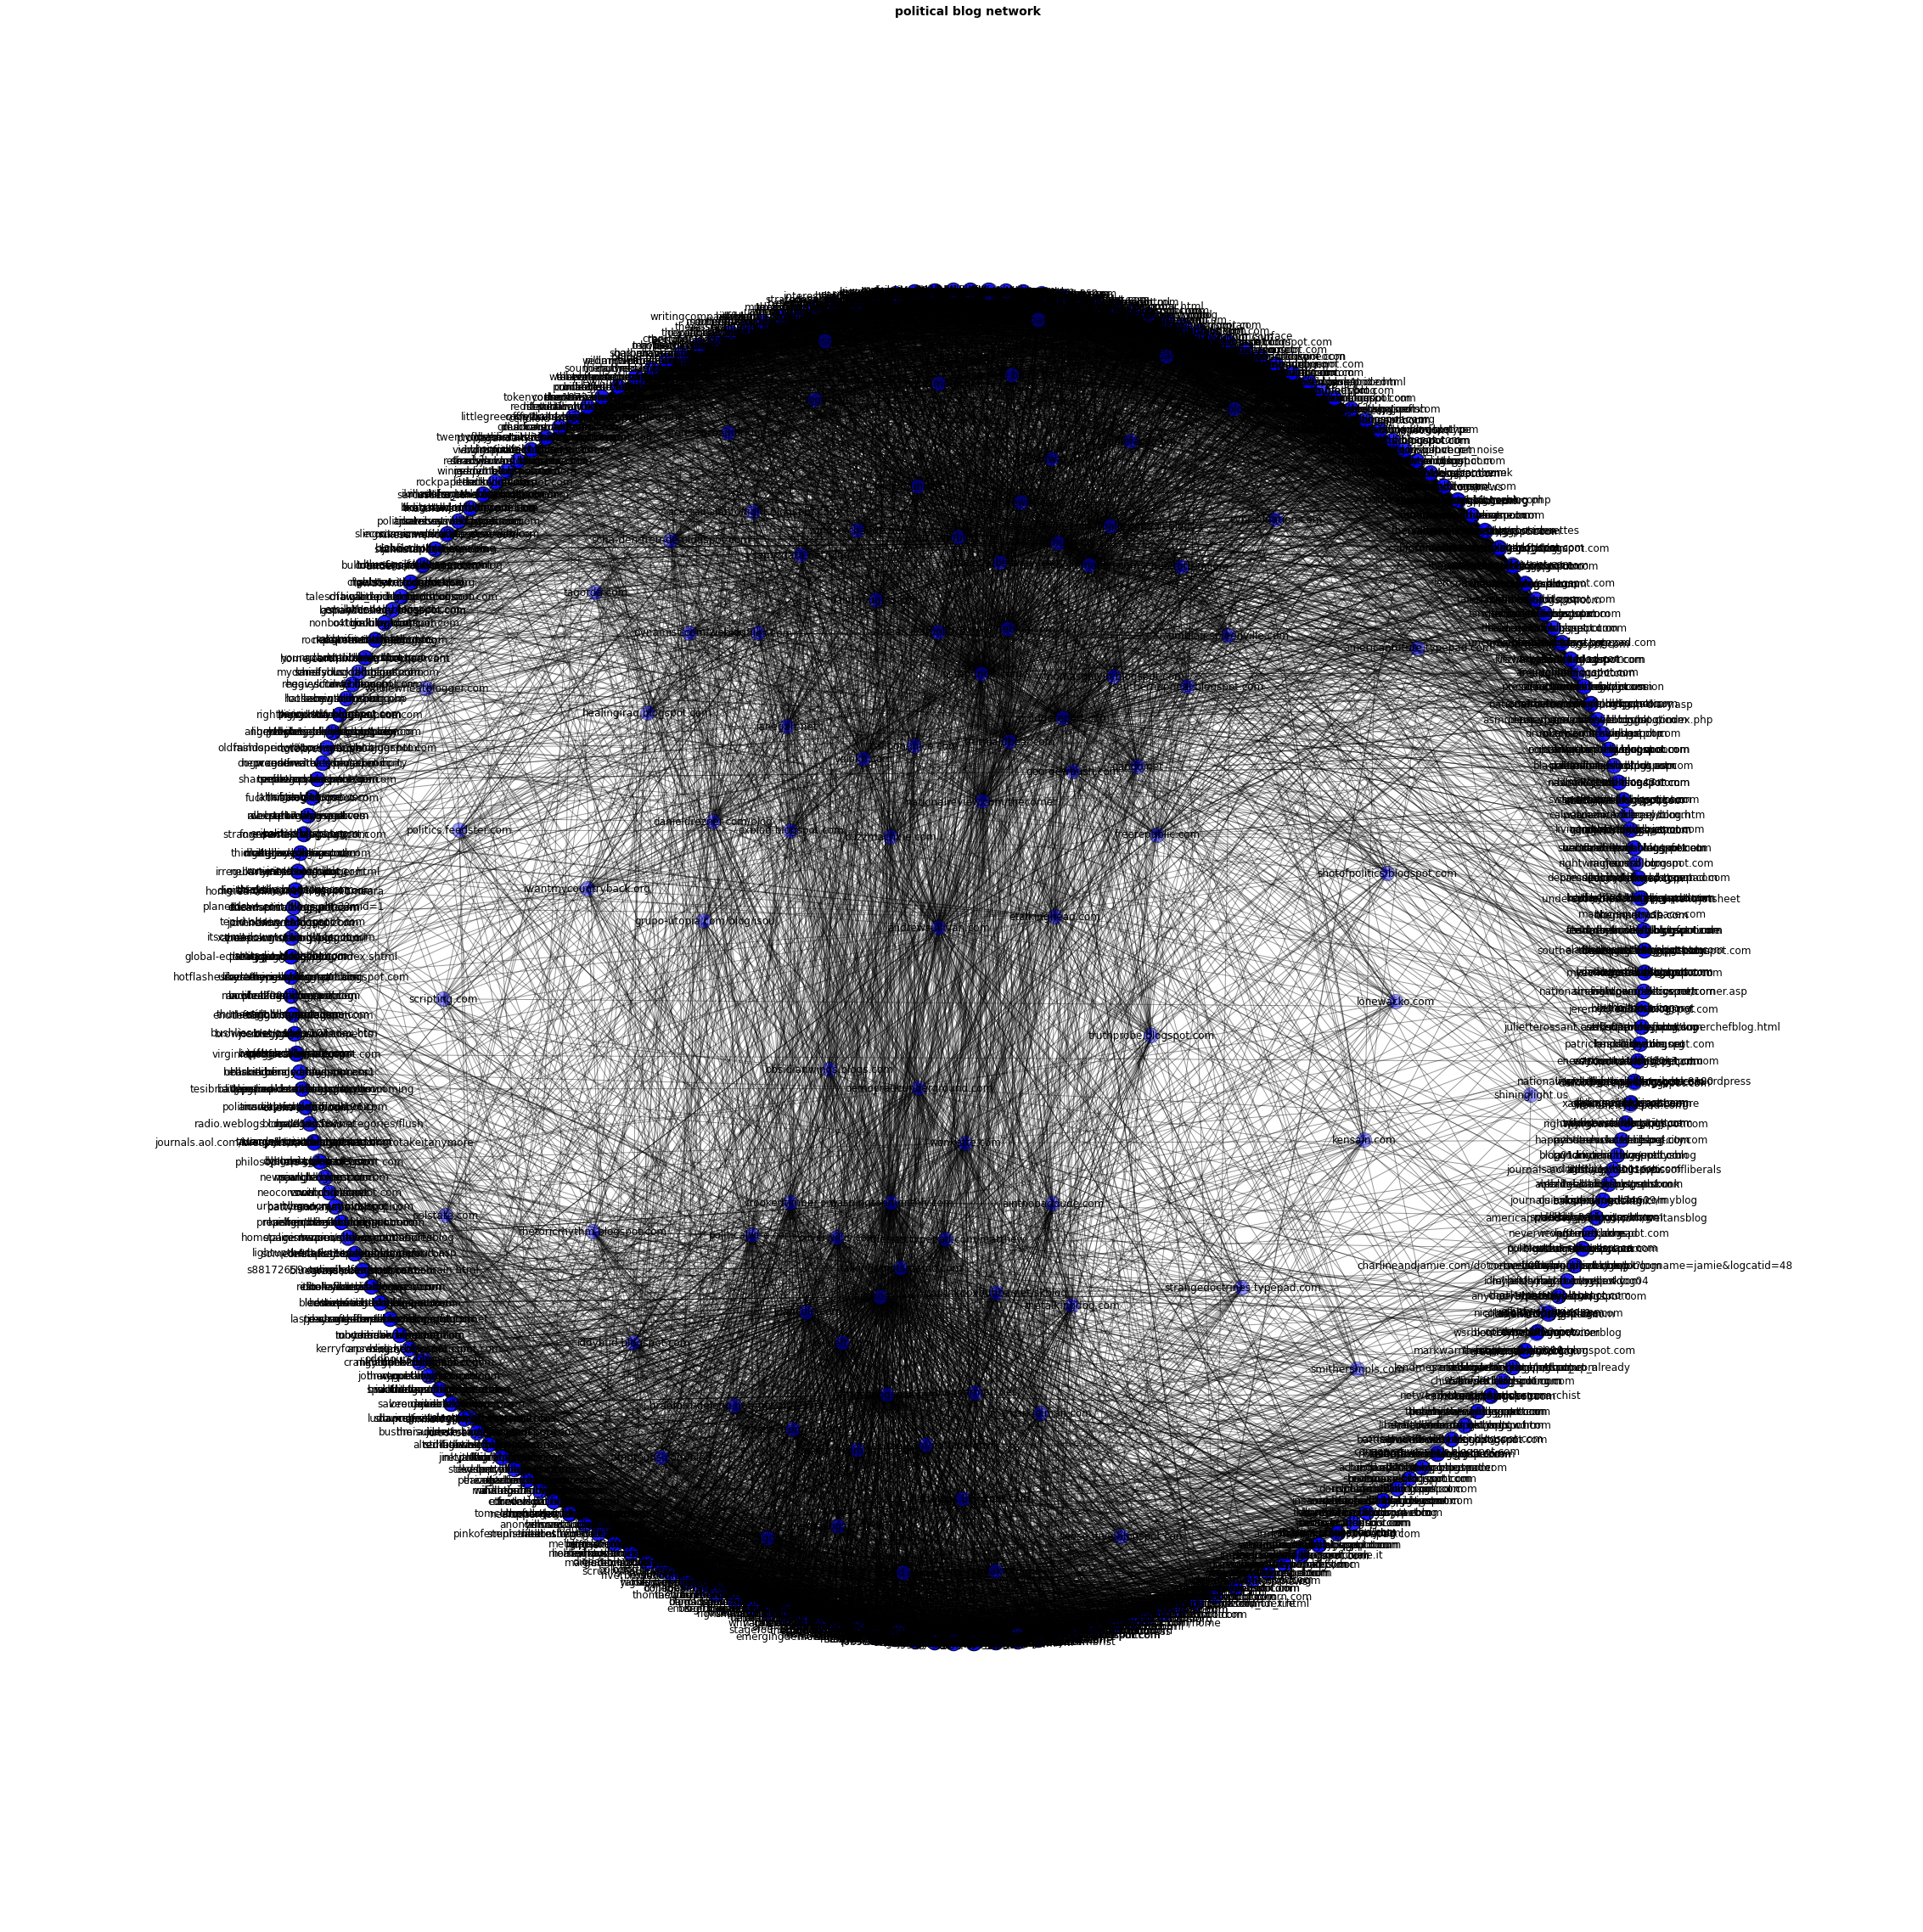

In [6]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=1000, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 14}
plt.title("political blog network", font)


nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

In [7]:
centrality= nx.eigenvector_centrality_numpy(G)

In [8]:
blog_list = []
for node in centrality:
    blog_list.append((node,centrality[node]))
    
sorted_blog_list = blog_list.sort(key=lambda x: x[1])

In [9]:
sorted(blog_list, key=lambda x: x[1], reverse=True)

[(u'atrios.blogspot.com', 0.19460836007497934),
 (u'dailykos.com', 0.16085880865133684),
 (u'washingtonmonthly.com', 0.14572953582904344),
 (u'digbysblog.blogspot.com', 0.14165745601016705),
 (u'bodyandsoul.typepad.com', 0.1400125861502596),
 (u'liberaloasis.com', 0.13870430871243794),
 (u'tbogg.blogspot.com', 0.13695090011935723),
 (u'corrente.blogspot.com', 0.12866467087664812),
 (u'talkingpointsmemo.com', 0.12715536738447378),
 (u'dneiwert.blogspot.com', 0.12147092830075572),
 (u'pandagon.net', 0.12097858368894848),
 (u'billmon.org', 0.11660426776905004),
 (u'xnerg.blogspot.com', 0.11404484059325103),
 (u'madkane.com/notable.html', 0.11343266793288546),
 (u'elayneriggs.blogspot.com', 0.11179345712895315),
 (u'busybusybusy.com', 0.1096004343285894),
 (u'instapundit.com', 0.10691924503989549),
 (u'michaelberube.com', 0.1052925570915921),
 (u'pacificviews.org', 0.10497670909352734),
 (u'nielsenhayden.com/electrolite', 0.10474698234930355),
 (u'prospect.org/weblog', 0.10452079323103278)

2. What are the 10 most influential blogs?

In [10]:
sorted_blog_list_desc =sorted(blog_list, key=lambda x: x[1], reverse=True)
print "Ten most influential blogs are:"
sorted_blog_list_desc[0:10]

Ten most influential blogs are:


[(u'atrios.blogspot.com', 0.19460836007497934),
 (u'dailykos.com', 0.16085880865133684),
 (u'washingtonmonthly.com', 0.14572953582904344),
 (u'digbysblog.blogspot.com', 0.14165745601016705),
 (u'bodyandsoul.typepad.com', 0.1400125861502596),
 (u'liberaloasis.com', 0.13870430871243794),
 (u'tbogg.blogspot.com', 0.13695090011935723),
 (u'corrente.blogspot.com', 0.12866467087664812),
 (u'talkingpointsmemo.com', 0.12715536738447378),
 (u'dneiwert.blogspot.com', 0.12147092830075572)]

In [ ]:
3. What are the 10 least influential blogs?

In [11]:
sorted_blog_list_asc=sorted(blog_list, key=lambda x: x[1])
print "Ten least influential blogs are:"
sorted_blog_list_asc[0:10]

Ten least influential blogs are:


[(u'thelonedem.com', 6.977339183826001e-19),
 (u'digital-democrat.blogspot.com', 7.5593388942072795e-19),
 (u'americanworldview.tripod.com/weltansblog', 7.438790790696728e-09),
 (u'quimundus.modblog.com', 6.704098662934567e-08),
 (u'batr.org/commentary.html', 6.766561471865712e-07),
 (u'batr.net', 6.767361565980861e-07),
 (u'democratvoice.org', 1.0406263430232106e-06),
 (u'quimundus.squarespace.com', 6.098983141249314e-06),
 (u'massachusetts-liberal.com', 9.360725065425992e-06),
 (u'thingsasitis.net', 1.1599475002590943e-05)]

In [ ]:
4. Answer this question for both left wing and right wing blogs seperately. (Optional 10 Extra Credit Points)

In [12]:
color_list=[]
GL=nx.Graph()
GR=nx.Graph()
node=M.nodes(data=True)
for i in range(0, M.number_of_nodes(), 1):
    if node[i][1]['value'] == 1:
        color_list.append('k')
        GR.add_node(node[i][0])
    else:
        color_list.append('b')
        GL.add_node(node[i][0])

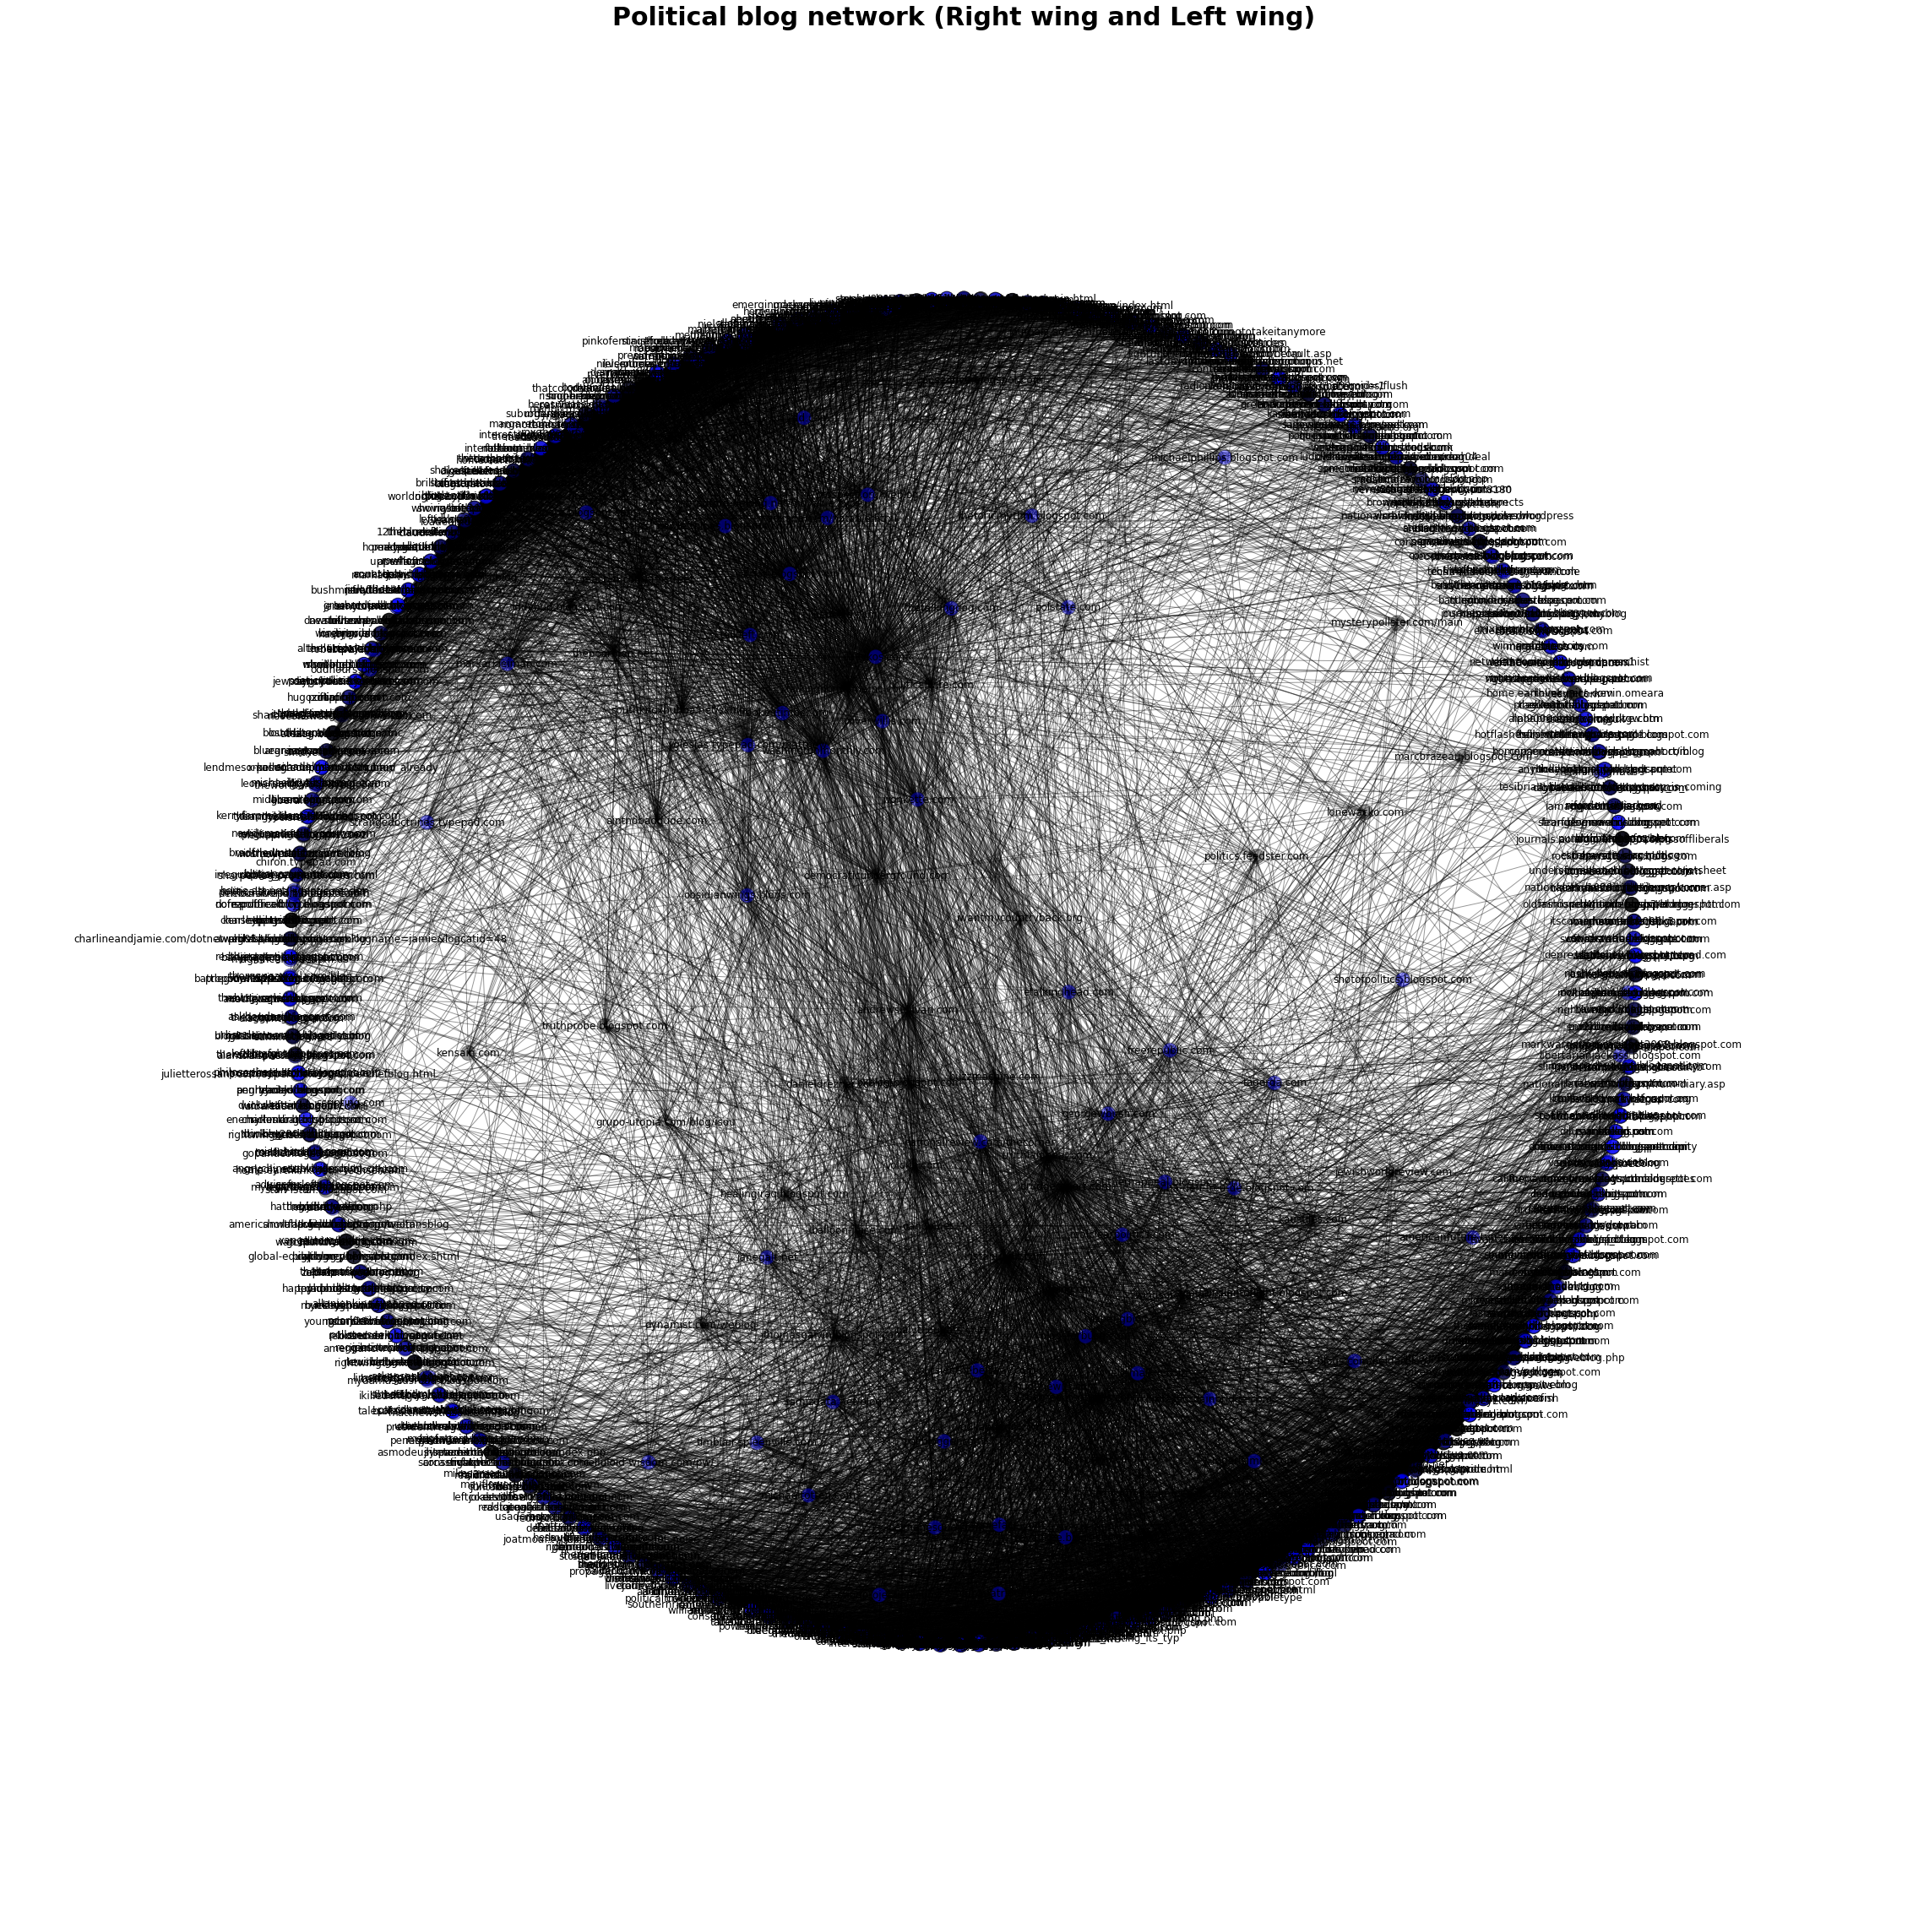

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 30}
plt.title("Political blog network (Right wing and Left wing)", font)

nx.draw_networkx_nodes(G,pos,node_color=color_list,alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

In [14]:
for u,v,data in M.edges_iter(data=True):
    if GL.has_node(u) and GL.has_node(v) and GL.has_edge(u,v) :
        GL[u][v]['weight'] += 1
    elif GL.has_node(u) and GL.has_node(v):
        GL.add_edge(u, v, weight=1)
    else:
        continue

In [15]:
for u,v,data in M.edges_iter(data=True):
    if GR.has_node(u) and GR.has_node(v) and GR.has_edge(u,v) :
        GR[u][v]['weight'] += 1
    elif GR.has_node(u) and GR.has_node(v):
        GR.add_edge(u, v, weight=1)
    else:
        continue

In [16]:
centrality_L= nx.eigenvector_centrality_numpy(GL)
centrality_R= nx.eigenvector_centrality_numpy(GR)

In [17]:
def sorting(centrality):
    
    List = []
    for node in centrality:
        List.append((node,centrality[node]))
    sorted_list_desc =sorted(List, key=lambda x: x[1], reverse=True)
    sorted_list_asc=sorted(List, key=lambda x: x[1])
    return sorted_list_desc, sorted_list_asc

In [18]:
sorted_list_desc_L, sorted_list_asc_L = sorting(centrality_L)
print "Ten most influential Left wing blogs:"
sorted_list_desc_L[0:10]

Ten most influential Left wing blogs:


[(u'atrios.blogspot.com', 0.21014471148743782),
 (u'dailykos.com', 0.168887498022702),
 (u'bodyandsoul.typepad.com', 0.15620581384468216),
 (u'liberaloasis.com', 0.15586157478431176),
 (u'digbysblog.blogspot.com', 0.15491799802870002),
 (u'tbogg.blogspot.com', 0.15057628736016984),
 (u'corrente.blogspot.com', 0.14461524166958675),
 (u'washingtonmonthly.com', 0.13912545257202877),
 (u'dneiwert.blogspot.com', 0.13430191643368586),
 (u'pandagon.net', 0.13254155028960113)]

In [19]:
print "ten least influential Left wing blogs:"
sorted_list_asc_L[0:10]

ten least influential Left wing blogs:


[(u'jcchurch.blogspot.com', -8.233523132780277e-18),
 (u'gotzfamily.org/weblog', -7.252280079765496e-18),
 (u'hoeffelforsenate.com/blog', -6.8267601149901996e-18),
 (u'chak.org/blog', -6.818670165633371e-18),
 (u'kerrytalkingpoints.blogspot.com', -6.765413928012717e-18),
 (u'enemykombatant.blogspot.com', -6.382028276670359e-18),
 (u'roil.blogspot.com', -6.356273395733866e-18),
 (u'xanga.com/home.aspx?user=phknrocket1k', -6.1757053212554825e-18),
 (u'therustybarrel.com/david/blog', -6.116748582507158e-18),
 (u'probitus.obrien4.net', -6.07777056786916e-18)]

In [20]:
sorted_list_desc_R, sorted_list_asc_R = sorting(centrality_R)
print "ten most influential Right wing blogs:"
sorted_list_desc_R[0:10]

ten most influential Right wing blogs:


[(u'instapundit.com', 0.21130462294596916),
 (u'blogsforbush.com', 0.20259499592591645),
 (u'hughhewitt.com', 0.16819176553481544),
 (u'lashawnbarber.com', 0.15892783854937367),
 (u'michellemalkin.com', 0.1477045282858315),
 (u'wizbangblog.com', 0.14672175943553029),
 (u'powerlineblog.com', 0.14614009491871846),
 (u'vodkapundit.com', 0.13718343720517884),
 (u'littlegreenfootballs.com/weblog', 0.13699993217225226),
 (u'outsidethebeltway.com', 0.12316955954206632)]

In [21]:
print "ten least influential Right wing blogs:"
sorted_list_asc_R[0:10]

ten least influential Right wing blogs:


[(u'skinmeister.name', -4.617858534290517e-18),
 (u'politicalanimals.blogspot.com', -4.1006251230781274e-18),
 (u'louisville.edu/~bebusc02/blog/notarobot.html', -3.997514405107202e-18),
 (u'masononline.biz', -3.929445203649138e-18),
 (u'vandyconservative.blogspot.com', -3.8843613410317635e-18),
 (u'criticalbill.blogspot.com', -3.581599949124311e-18),
 (u'adonai.cc', -3.56215090448808e-18),
 (u'michaelsavagelistener.blog-city.com', -3.4391983143224023e-18),
 (u'rmcdaniel.blogspot.com', -3.436517846541193e-18),
 (u'inmyrightmind.com', -3.4140027415340182e-18)]